<h1 align="center" style="color: yellow">Natural Language Processing Task#2</h1>

***

Names:
* 1- Abdelrahman Mahmoud Alsayed Ibrahim - 20190732
* 2- Belal Ashraf - 20190137
* 3- Mohamed Abdo - 20190460


***
## Requirements

### In this task, you are required to implement the subset construction technique. Your code should generate the DFA from the NFA in the following problem. The problem is to detect all the strings from 0s and 1s such that the 4th symbol from the end is 1.

#### You are required to do the following:
1- Develop a function called NFA_To_DFA(NFA, start_state, final_states)
NFA parameter is a dictionary that represents the transition function of the graph in the
following format.
    NFA = {
          (‘q0’, 0) : [‘q0’],
          (‘q0’, 1) : [‘q0’, ‘q1’],
          (‘q1’, 0) : [‘q1’],
          (‘q1’, 1) : [‘q2’],
          ..
          ..
          (‘qn’, 0) : [],
          (‘qn’, 1) : [],
}
start_state = ‘q0’
final_states = [‘qn’]
The function should return the DFA transition function, start_states and final states in the
same mentioned format.
2- Draw the returned DFA transition function using any python graph library you want.
3- Find a string input that passes through all the states of the DFA (16 state)
***
## Notebook Contents:
Your notebook should contain the following:
1. The required function NFA_To_DFA(NFA, start_state, final_states) in a
separate cell. Feel free to use any extra functions.
2. Function draw_dfa(DFA, start_state, final_states) that draws the DFA
graph showing the start state and final states on it
3. The string input that passes through all the states of the DFA showing how you were
able to estimate it.

### NFA to detect all the strings from 0s and 1s such that the 4th symbol from the end is 1


In [104]:
nfa = {'alphabet': set(['0', '1']),
       'q0': {
           '0': set(['q0']),
           '1': set(['q0', 'q1'])},
       'q1': {
           '0': set(['q2']),
           '1': set(['q2'])},
       'q2': {
           '0': set(['q3']),
           '1': set(['q3'])},
       'q3': {
           '0': set(['q4']),
           '1': set(['q4'])},
       'q4': {}
       }

## NFA to DFA function:


In [105]:
def nfa_to_dfa(nfa, start_state, final_states):
    # The function should return the DFA transition function, start_states and final states in the same mentioned format.
    dfa = {}
    queue = [frozenset([start_state])]

    while queue:
        state_set = queue.pop(0)
        if state_set in dfa:
            continue

        dfa[state_set] = {}
        for symbol in nfa['alphabet']:
            new_state_set = set()
            for state in state_set:
                if symbol in nfa[state]:
                    new_state_set.update(nfa[state][symbol])
            if new_state_set:
                dfa[state_set][symbol] = frozenset(new_state_set)
                if frozenset(new_state_set) not in dfa:
                    queue.append(frozenset(new_state_set))

    dfa_start = frozenset([start_state])
    dfa_final = set()
    for state_set in dfa:
        if final_states.intersection(state_set):
            dfa_final.add(state_set)

    return dfa, dfa_start, dfa_final

### Testing the output of the function

In [106]:
dfa, s, f = nfa_to_dfa(nfa, 'q0', set(['q4']))
# There are going to be 16 states as expected because the situation that the dfa is 2 power the n, and the is number of NFA states
print("----Transition table of DFA----\n",dfa)
print('\n')
print("---Start State of DFA---\n",s)
print('\n')
print("---Set of Final states of DFA---\n",f)

----Transition table of DFA----
 {frozenset({'q0'}): {'1': frozenset({'q1', 'q0'}), '0': frozenset({'q0'})}, frozenset({'q1', 'q0'}): {'1': frozenset({'q1', 'q2', 'q0'}), '0': frozenset({'q2', 'q0'})}, frozenset({'q1', 'q2', 'q0'}): {'1': frozenset({'q1', 'q2', 'q3', 'q0'}), '0': frozenset({'q2', 'q3', 'q0'})}, frozenset({'q2', 'q0'}): {'1': frozenset({'q1', 'q3', 'q0'}), '0': frozenset({'q3', 'q0'})}, frozenset({'q1', 'q2', 'q3', 'q0'}): {'1': frozenset({'q4', 'q1', 'q3', 'q0', 'q2'}), '0': frozenset({'q4', 'q2', 'q3', 'q0'})}, frozenset({'q2', 'q3', 'q0'}): {'1': frozenset({'q4', 'q1', 'q3', 'q0'}), '0': frozenset({'q4', 'q3', 'q0'})}, frozenset({'q1', 'q3', 'q0'}): {'1': frozenset({'q4', 'q1', 'q2', 'q0'}), '0': frozenset({'q4', 'q2', 'q0'})}, frozenset({'q3', 'q0'}): {'1': frozenset({'q4', 'q1', 'q0'}), '0': frozenset({'q4', 'q0'})}, frozenset({'q4', 'q1', 'q3', 'q0', 'q2'}): {'1': frozenset({'q4', 'q1', 'q3', 'q0', 'q2'}), '0': frozenset({'q4', 'q2', 'q3', 'q0'})}, frozenset({'q4'

## Function to Draw DFA

In [107]:
import graphviz

def draw_dfa(dfa, start_state, final_states):
    g = graphviz.Digraph(format='png',)

    for state in dfa.keys():
        if state == start_state:
            g.node(str(state), shape='circle', style='bold',color='blue')
        elif state in final_states:
            g.node(str(state), shape='doublecircle',style='bold',color='green')
        else:
            g.node(str(state), shape='circle',style='bold',color='red')

    for state, transitions in dfa.items():
        for symbol, next_state in transitions.items():
            g.edge(str(state), str(next_state), label=symbol)

    g.render('dfa')

draw_dfa(dfa,s,f)

## Visualizing the Image

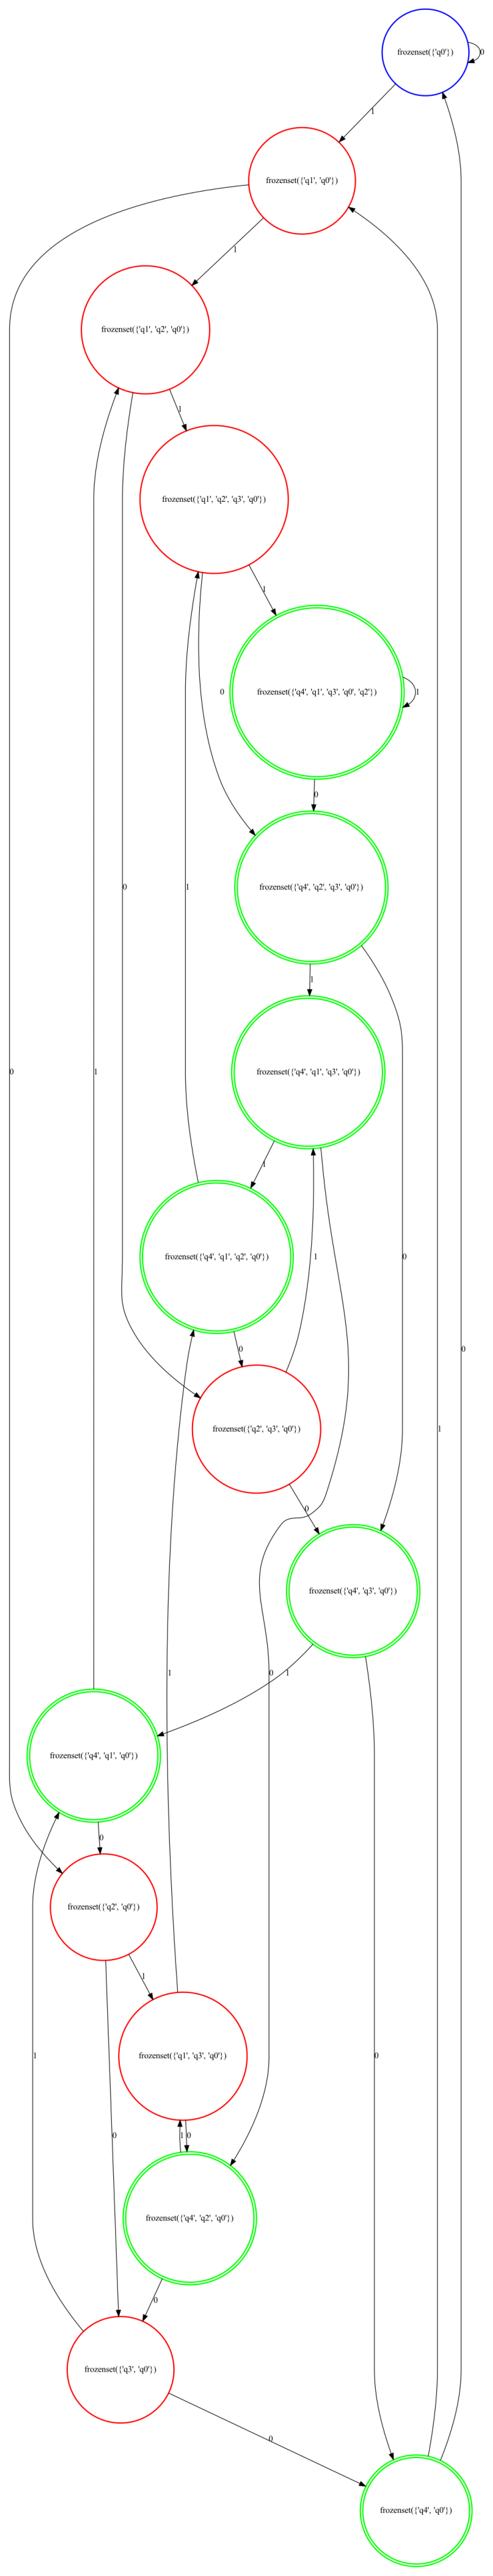

In [108]:
from skimage.io import imread
from matplotlib import pyplot as plt
img = imread('dfa.png')
plt.figure(figsize=(100,50))
plt.axis('off')
plt.imshow(img)
plt.show()

## Find a string input that passes through all the states of the DFA (16 state)

In [109]:
def find_string_for_all_states(dfa, start_state):
    # Depth first Search starting from the initial state
    visited = set()
    stack = [start_state]
    string = ""
    while stack:
        state = stack.pop()
        if state in visited:
            continue
        visited.add(state)
        for symbol, next_state in dfa[state].items():
            stack.append(next_state)
            string += symbol
    return string
print(find_string_for_all_states(dfa,frozenset({'q0'})))

10101010101010101010101010101010
